In [1]:
import matplotlib.pyplot as plt

## Oppgave

Regn ut fem steg i Eulers metode i eksemplene over og illustrer stegene med piler som i illustrasjonen av to steg over. Du kan kanskje finne inspirasjon [her](EulerSystemSteg.ipynb).

In [2]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse
    differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]

  # linjen under er ny
  y_values = [y0]

  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])

    # de to linjene under er nye
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])

    # Legger til de nye verdiene i listene
    x_values.append(x_next)

    # linjen under er ny
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

In [3]:
# Forteller python om funksjonene f og g

def f(t, x, y):
  return 2*t*x + y

def g(t, x, y):
  return x**(-2) + np.exp(-t)

In [4]:
# Angir startbetingelser og parametere
t0 = 0   # Starttidspunkt
x0 = 0.2  # Startverdi for x
y0 = 1   # Startverdi for y
tn = 1   # Slutt-tidspunkt
n = 5  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

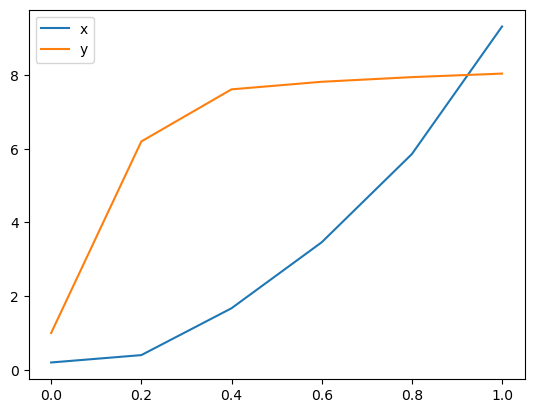

In [5]:
# Plotter x og y
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend();

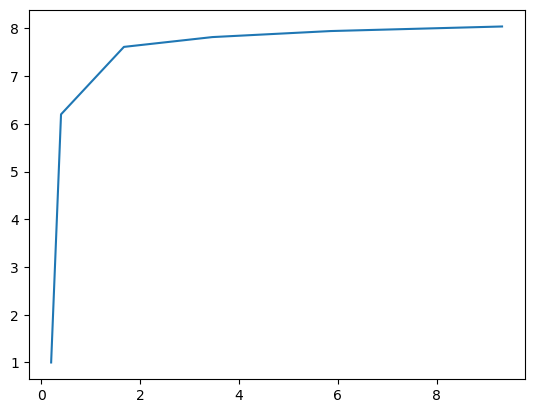

In [6]:
plt.plot(x_values, y_values)

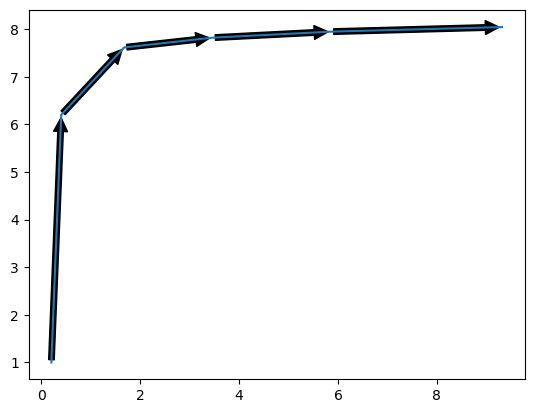

In [7]:
import matplotlib.patches as patches

plt.plot(x_values, y_values)
ax=plt.gca()
arrows = []
for (x_start, x_end), (y_start, y_end) in zip(zip(x_values[:-1], x_values[1:]), zip(y_values[:-1], y_values[1:])):
    ax.add_patch(patches.FancyArrowPatch(
        (x_start, y_start), (x_end, y_end),
        mutation_scale=20,
        #arrowstyle="->",
        color="k"))